FACE NUMBER: 1
FACE CONFIDENCE: 0.95
nFACE BOUNDING BOX:nxmin: 0.62160295
ymin: 0.17908838
width: 0.10471368
height: 0.15731835

RIGHT_EYE:
x: 0.65518457
y: 0.22794613

LEFT_EYE:
x: 0.69531244
y: 0.22327542

FACE NUMBER: 2
FACE CONFIDENCE: 0.93
nFACE BOUNDING BOX:nxmin: 0.39155507
ymin: 0.43000862
width: 0.1370064
height: 0.20591655

RIGHT_EYE:
x: 0.4340211
y: 0.4870567

LEFT_EYE:
x: 0.48699117
y: 0.49555358

FACE NUMBER: 3
FACE CONFIDENCE: 0.84
nFACE BOUNDING BOX:nxmin: 0.70671755
ymin: 0.39060858
width: 0.14628893
height: 0.21984777

RIGHT_EYE:
x: 0.74515224
y: 0.48104057

LEFT_EYE:
x: 0.79773515
y: 0.4405835

FACE NUMBER: 4
FACE CONFIDENCE: 0.8
nFACE BOUNDING BOX:nxmin: 0.49168843
ymin: 0.21536896
width: 0.09804058
height: 0.14732856

RIGHT_EYE:
x: 0.53064835
y: 0.25237176

LEFT_EYE:
x: 0.5684695
y: 0.279362

FACE NUMBER: 5
FACE CONFIDENCE: 0.77
nFACE BOUNDING BOX:nxmin: 0.27112103
ymin: 0.23788953
width: 0.12076676
height: 0.1814399

RIGHT_EYE:
x: 0.31213224
y: 0.28489468

LEFT_EYE

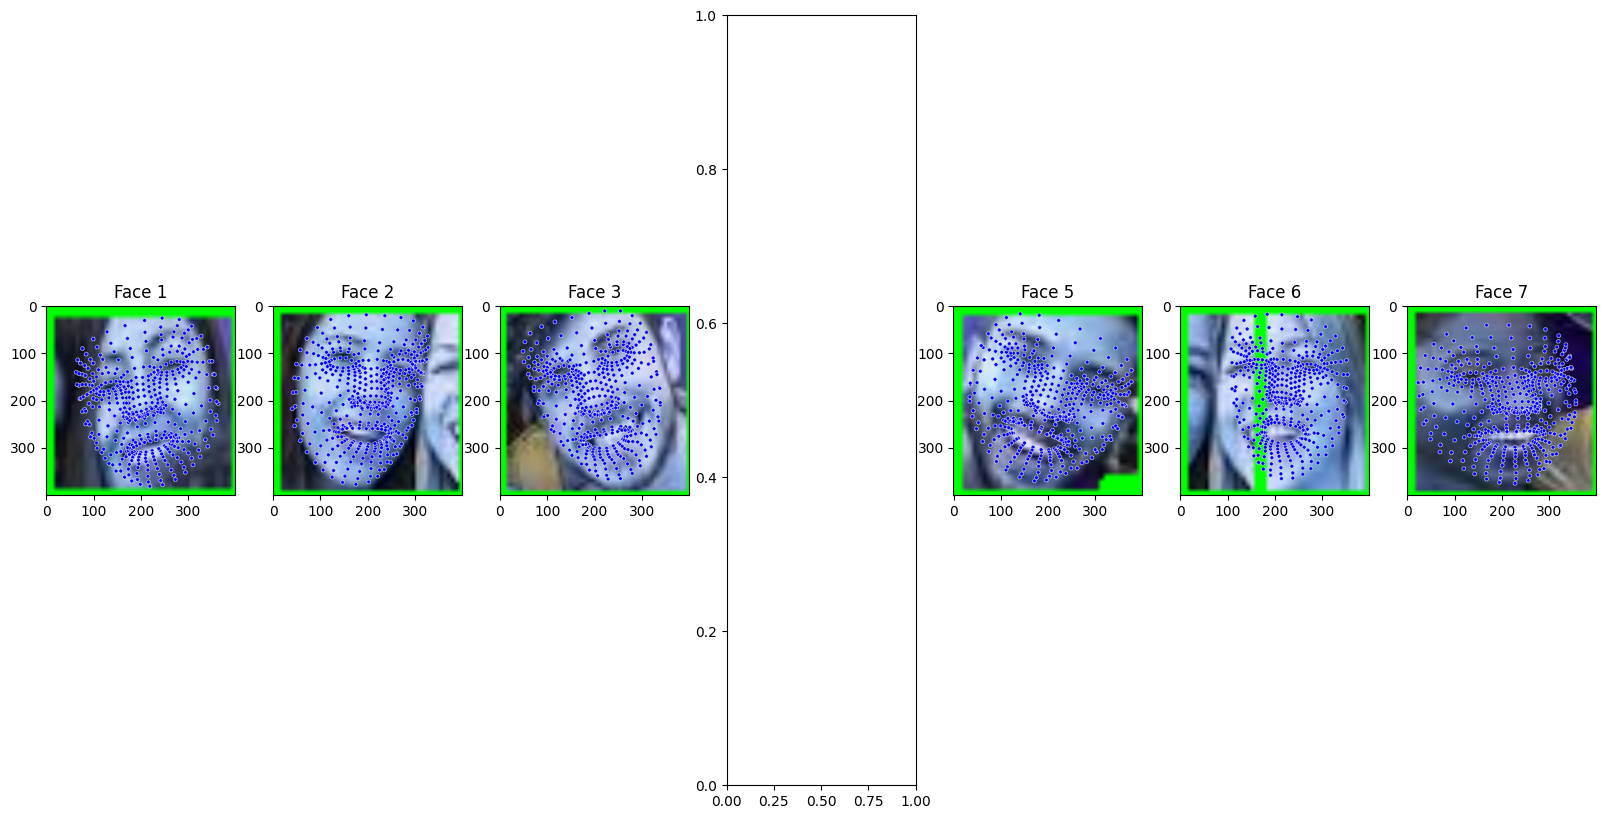

In [ ]:
# TEST
# For static images:
with mp_face_detection.FaceDetection(
        model_selection=1, min_detection_confidence=0.5) as face_detection:
    with mp_face_mesh.FaceMesh(
            static_image_mode=True,
            max_num_faces=2,
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5) as face_mesh:
        for idx, file in enumerate(IMAGE_FILES):
            image = cv2.imread(file)
            # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
            results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            fig, axs = plt.subplots(1, len(results.detections), figsize=(20, 10))
            if results.detections:
                for face_no, face in enumerate(results.detections):
                    print(f"FACE NUMBER: {face_no+1}")
                    print("==============================")
                    print(f"FACE CONFIDENCE: {round(face.score[0], 2)}")
                    face_data = face.location_data
                    print(f"nFACE BOUNDING BOX:n{face_data.relative_bounding_box}")
                    for i in range(2):
                        print(f"{mp_face_detection.FaceKeyPoint(i).name}:")
                        print(f"{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}")
                for i, detection in enumerate(results.detections):
                    bbox = detection.location_data.relative_bounding_box
                    h, w, _ = image.shape
                    x1 = int(bbox.xmin * w) - int(0.05 * int(bbox.xmin * w))
                    y1 = int(bbox.ymin * h) - int(0.05 * int(bbox.ymin * h))
                    x2 = int((bbox.xmin + bbox.width) * w) + int(0.05 * int(bbox.xmin * w))
                    y2 = int((bbox.ymin + bbox.height) * h) + int(0.05 * int(bbox.ymin * h))
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    face = image[y1:y2, x1:x2]
                    face = cv2.resize(face, (400, 400))
                    results = face_mesh.process(face)
                    if results.multi_face_landmarks:
                        face_landmarks = results.multi_face_landmarks[0]
                        annotated_image = face.copy()
                        mp_drawing.draw_landmarks(annotated_image, face_landmarks)
                        axs[i].imshow(annotated_image)
                        axs[i].set_title(f"Face {i+1}")
            else:
                axs[0].imshow(image)
                axs[0].set_title("No face detected")
            plt.show()